In [1]:
import numpy as np
import pandas as pd
import glob

In [2]:
def cal_bmi(w, h):
    return round(w / h ** 2, 1)

In [3]:
cal_bmi(50, 1.54)

21.1

In [4]:
glob.glob('*')

['hi_predict_dataset.csv',
 'hi_dataset.csv',
 'weight-height.csv',
 'hi_train_dataset.csv',
 'answer.csv',
 '1311__dataset.csv',
 'main.ipynb',
 'train_step.txt',
 '2021__dataset.csv',
 'vietnam_dataset.csv',
 '500_Person_Gender_Height_Weight_Index.csv']

In [5]:
df = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
df

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [6]:
df.iloc[:,:]

,Gender,Height,Weight,Index
0,Male,174,96,4
1,Male,189,87,2
2,Female,185,110,4
3,Female,195,104,3
4,Male,149,61,3
...,...,...,...,...
495,Female,150,153,5
496,Female,184,121,4
497,Female,141,136,5
498,Male,150,95,5


In [7]:
df['BMI'] = round(df['Weight'] / (df['Height'] / 100) ** 2, 1)

In [8]:
df

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.7
1,Male,189,87,2,24.4
2,Female,185,110,4,32.1
3,Female,195,104,3,27.4
4,Male,149,61,3,27.5
...,...,...,...,...,...
495,Female,150,153,5,68.0
496,Female,184,121,4,35.7
497,Female,141,136,5,68.4
498,Male,150,95,5,42.2


In [9]:
# 450 hàng để train
df.iloc[:450,:].to_csv('1311__dataset.csv')

In [10]:
# 50 hàng dữ liệu dùng để predict, ko có cột Weight 
df.iloc[450:,:].drop('Weight', axis=1).reset_index(drop=True).to_csv('2021__dataset.csv')

In [11]:
df.loc[450:][['Weight']].reset_index(drop=True).to_csv('answer.csv')

In [12]:
df

,Gender,Height,Weight,Index,BMI
0,Male,174,96,4,31.7
1,Male,189,87,2,24.4
2,Female,185,110,4,32.1
3,Female,195,104,3,27.4
4,Male,149,61,3,27.5
...,...,...,...,...,...
495,Female,150,153,5,68.0
496,Female,184,121,4,35.7
497,Female,141,136,5,68.4
498,Male,150,95,5,42.2


In [13]:
df.Height = df['Height'].apply(lambda x: x/100)

In [14]:
import seaborn as sns

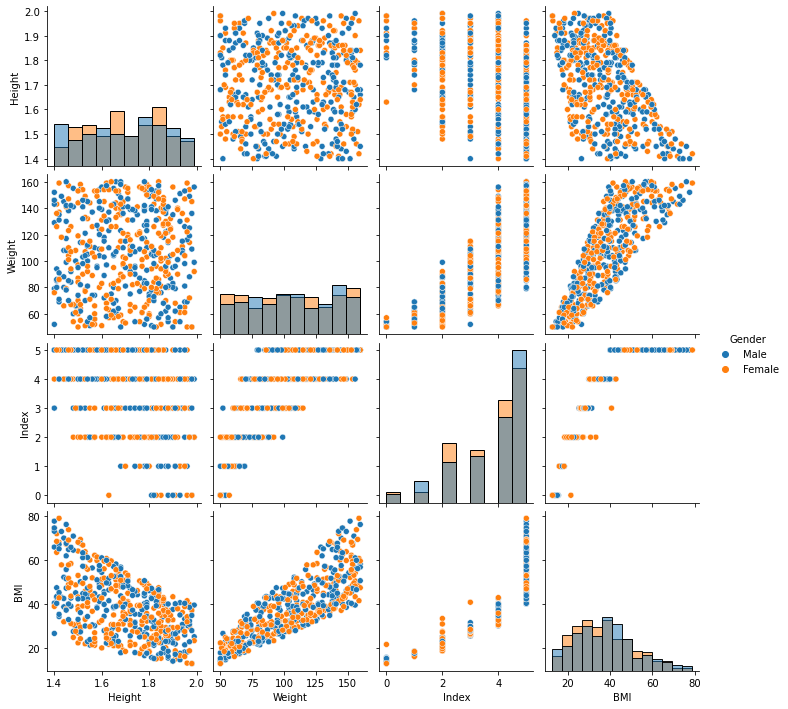

In [15]:
sns.pairplot(df, hue='Gender', diag_kind='hist')

<AxesSubplot:xlabel='Height', ylabel='Count'>

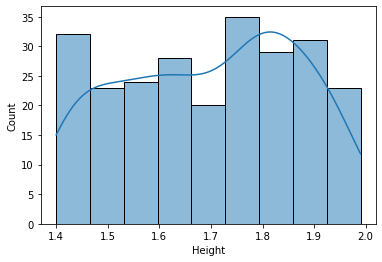

In [16]:
sns.histplot(df[df.Gender == 'Male']['Height'], kde=True)

<AxesSubplot:xlabel='Height', ylabel='Count'>

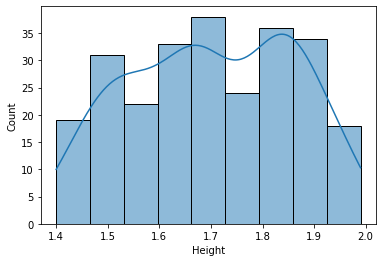

In [17]:
sns.histplot(df[df.Gender == 'Female']['Height'], kde=True)

In [18]:
import matplotlib.pyplot as plt

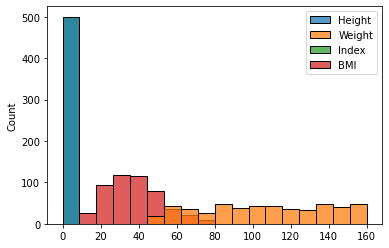

In [19]:
f, ax = plt.subplots()
ax = sns.histplot(df, multiple="stack")
plt.show()

In [20]:
df.Height.describe()

count    500.000000
mean       1.699440
std        0.163753
min        1.400000
25%        1.560000
50%        1.705000
75%        1.840000
max        1.990000
Name: Height, dtype: float64

In [21]:
df.Weight.describe()

count    500.000000
mean     106.000000
std       32.382607
min       50.000000
25%       80.000000
50%      106.000000
75%      136.000000
max      160.000000
Name: Weight, dtype: float64

In [22]:
df.BMI.describe()

count    500.0000
mean      37.7670
std       13.9663
min       12.8000
25%       27.1750
50%       37.0000
75%       46.4000
max       78.9000
Name: BMI, dtype: float64

In [23]:
# label encoder
# df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Female' else 0) # để female là 1
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0) # để male là 1

In [24]:
# one hot encoder
# df = pd.get_dummies(df, columns=['Gender'], drop_first=True)

In [25]:
df

,Gender,Height,Weight,Index,BMI
0,0,1.74,96,4,31.7
1,0,1.89,87,2,24.4
2,1,1.85,110,4,32.1
3,1,1.95,104,3,27.4
4,0,1.49,61,3,27.5
...,...,...,...,...,...
495,1,1.50,153,5,68.0
496,1,1.84,121,4,35.7
497,1,1.41,136,5,68.4
498,0,1.50,95,5,42.2


In [26]:
from sklearn.preprocessing import MinMaxScaler

In [27]:
height_scaler = MinMaxScaler().fit(df[['Height']].values)
df['Height'] = height_scaler.transform(df[['Height']].values).reshape(-1)

In [28]:
weight_scaler = MinMaxScaler().fit(df[['Weight']].values)
df['Weight'] = weight_scaler.transform(df[['Weight']].values).reshape(-1)

In [29]:
bmi_scaler = MinMaxScaler().fit(df[['BMI']].values)
df['BMI'] = bmi_scaler.transform(df[['BMI']].values).reshape(-1)

In [30]:
features = [i for i in df.columns if i != 'Weight']
predicts = 'Weight'

In [31]:
features

['Gender', 'Height', 'Index', 'BMI']

In [32]:
predicts

'Weight'

In [33]:
X = df[features].values
y = df[predicts].values

In [34]:
X.shape

(500, 4)

In [35]:
y.shape

(500,)

In [36]:
predict_dataset = df.loc[450:].reset_index(drop=True)

In [37]:
predict_dataset = predict_dataset.drop('Weight', axis=1)

In [38]:
df = df.loc[:450]

In [39]:
predict_dataset

,Gender,Height,Index,BMI
0,0,0.372881,5,0.711044
1,1,0.542373,4,0.266263
2,1,0.491525,5,0.447806
3,0,0.711864,0,0.034796
4,1,0.728814,2,0.163389
5,0,0.610169,2,0.183056
6,1,0.813559,4,0.354009
7,1,0.593220,2,0.216339
8,0,0.237288,4,0.323752
9,1,0.745763,5,0.462935


In [40]:
X = df[features].values
y = df[predicts].values

In [41]:
X

array([[0.        , 0.57627119, 4.        , 0.28593041],
       [0.        , 0.83050847, 2.        , 0.17549168],
       [1.        , 0.76271186, 4.        , 0.29198185],
       ...,
       [1.        , 0.10169492, 5.        , 0.52344932],
       [0.        , 0.3220339 , 5.        , 0.67473525],
       [0.        , 0.37288136, 5.        , 0.71104387]])

In [42]:
y

array([0.41818182, 0.33636364, 0.54545455, 0.49090909, 0.1       ,
       0.49090909, 0.38181818, 0.55454545, 0.36363636, 0.48181818,
       0.28181818, 0.27272727, 0.46363636, 0.00909091, 0.26363636,
       0.51818182, 0.54545455, 0.71818182, 0.86363636, 0.80909091,
       0.54545455, 0.9       , 0.42727273, 0.80909091, 0.15454545,
       0.12727273, 0.40909091, 0.10909091, 0.99090909, 0.92727273,
       0.64545455, 0.01818182, 0.13636364, 0.73636364, 0.93636364,
       0.74545455, 0.58181818, 0.27272727, 0.92727273, 0.28181818,
       0.63636364, 0.52727273, 0.05454545, 0.61818182, 0.69090909,
       0.23636364, 0.65454545, 0.55454545, 0.2       , 0.92727273,
       0.77272727, 0.03636364, 0.54545455, 0.5       , 0.6       ,
       0.35454545, 0.38181818, 0.7       , 0.18181818, 0.34545455,
       0.03636364, 0.84545455, 0.03636364, 0.3       , 0.77272727,
       0.98181818, 0.41818182, 0.08181818, 0.29090909, 0.78181818,
       0.00909091, 0.60909091, 0.27272727, 0.22727273, 0.45454

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=42)

In [45]:
Xtrain.shape, Xtest.shape

((338, 4), (113, 4))

In [46]:
ytrain.shape, ytest.shape

((338,), (113,))

In [47]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

In [48]:
from sklearn.metrics import r2_score, mean_absolute_error

In [49]:
class Model:
    def __init__(self, name, model):
        self.name = name
        self.model = model
        self.is_trained = False
        self.mae = 0
    
    def fit(self, Xtrain, ytrain, Xtest, ytest):
        self.model.fit(Xtrain, ytrain)
        
        self.Xtest = Xtest
        self.ytest = ytest
        self.is_trained = True
        self.cal()
        
    def cal(self):
        self.ypredict = self.model.predict(self.Xtest)
        
        ypredict_transformed = weight_scaler.inverse_transform([self.ypredict])
        ytest_transformed = weight_scaler.inverse_transform([self.ytest])
        
        self.mae = mean_absolute_error(ytest_transformed, ypredict_transformed)
        self.r2 = r2_score(ytest_transformed.reshape(-1), ypredict_transformed.reshape(-1))
        print(self.r2)
    
    def __repr__(self):
        if (not self.is_trained):
            return '<({}, [is not train yet])>'.format(self.name)
        return '<({}, [{}], [{}])>'.format(self.name, self.mae, self.r2)

In [50]:
models = [
    Model('Decison Tree', DecisionTreeRegressor()),
    Model('Gradient Boosting', GradientBoostingRegressor()),
    Model('Random Forest', RandomForestRegressor())
]
models

[<(Decison Tree, [is not train yet])>,
 <(Gradient Boosting, [is not train yet])>,
 <(Random Forest, [is not train yet])>]

In [51]:
for i in range(len(models)):
    models[i].fit(Xtrain, ytrain, Xtest, ytest)

0.9800829765288863
0.9916381863498174
0.9929966407848191


In [52]:
models

[<(Decison Tree, [3.646017699115044], [0.9800829765288863])>,
 <(Gradient Boosting, [2.347184189771855], [0.9916381863498174])>,
 <(Random Forest, [2.2064601769911456], [0.9929966407848191])>]

In [53]:
weight_scaler.inverse_transform([models[1].model.predict(predict_dataset.values)]).round()

array([[156.,  91., 122.,  53.,  84.,  79., 129.,  81.,  80., 148., 121.,
        137.,  58., 145.,  84., 125.,  98., 147., 119., 106., 144., 111.,
         64., 151.,  81., 133., 147.,  71.,  59., 109., 115., 111.,  85.,
         85., 117., 112., 114.,  85., 135., 151.,  61., 152.,  51.,  57.,
         98., 151., 119., 137.,  92., 133.]])

<AxesSubplot:>

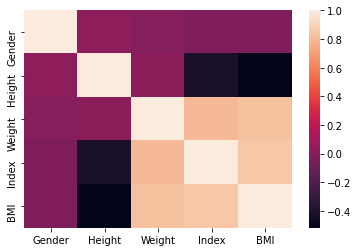

In [54]:
sns.heatmap(df.corr())